# <center>Laboratorium 11<br>Metody Numeryczne</center>

In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate 

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

C:\Users\48576\AppData\Local\Temp/ipykernel_5300/2731936472.py:1: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(1 + np.tan(x))


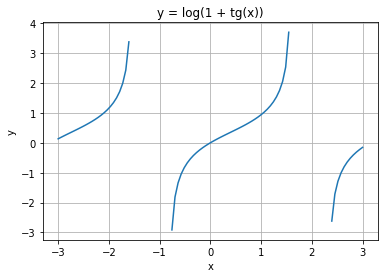

In [2]:
f = lambda x: np.log(1 + np.tan(x))
x = np.linspace(-3, 3, 100)
plt.plot(x, f(x))
plt.title("y = log(1 + tg(x))")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()

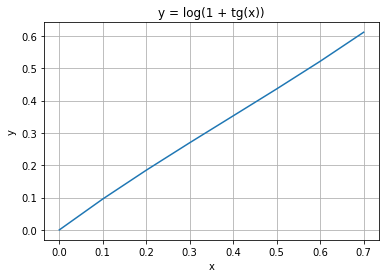

In [3]:
f = lambda x: np.log(1 + np.tan(x))
x = np.arange(0, np.pi/4, 0.1)
plt.plot(x, f(x))
plt.title("y = log(1 + tg(x))")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()

Całkowanie tej funkcji jest możliwe tylko na wybranych przedziałach. Funkcja nie może być całkowana po dowolnym przedziale, gdyż nie jest ciągła w swojej dziedzinie. Całkowanie może się odbyć na przedziale (0, pi/4), ponieważ funkcja w tym przedziale jest ciągła, ograniczona i różniczkowalna.

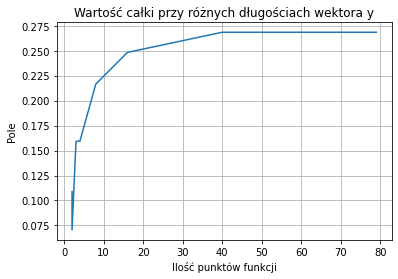

In [4]:
# Metoda trapezów
dx = [0.5, 0.4, 0.3,  0.2, 0.1, 0.05, 0.02, 0.01]
trapz = []
len_x = []
for i in dx:
    f = lambda x: np.log(1 + np.tan(x))
    x = np.arange(0, np.pi/4, i)
    trapz.append(sp.integrate.trapz(f(x), x))
    len_x.append(len(x))
plt.plot(len_x, trapz)
plt.title("Wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

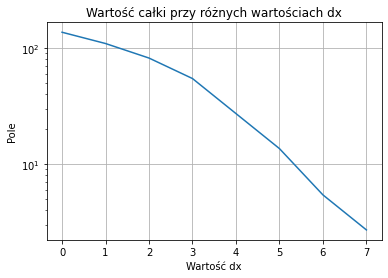

In [5]:
# Metoda trapezów
dx = [0.5, 0.4, 0.3,  0.2, 0.1, 0.05, 0.02, 0.01]
trapz = []
x = np.arange(0, np.pi/4, 0.001)
for i in dx:
    trapz.append(sp.integrate.trapz(f(x), dx = i))
plt.plot(range(len(dx)), trapz)
plt.title("Wartość całki przy różnych wartościach dx")
plt.ylabel("Pole")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

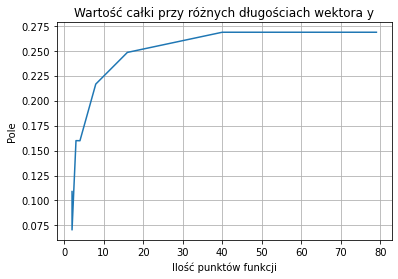

In [6]:
# Metoda Simpsona
dx = [0.5, 0.4, 0.3,  0.2, 0.1, 0.05, 0.02, 0.01]
simps = []
len_x = []
for i in dx:
    f = lambda x: np.log(1 + np.tan(x))
    x = np.arange(0, np.pi/4, i)
    simps.append(sp.integrate.simps(f(x), x))
    len_x.append(len(x))
plt.plot(len_x, simps)
plt.title("Wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

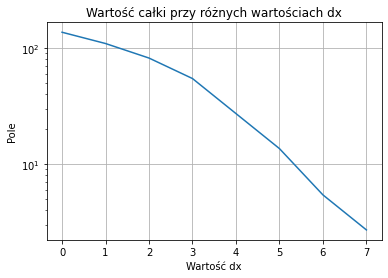

In [7]:
# Metoda Simpsona
dx = [0.5, 0.4, 0.3,  0.2, 0.1, 0.05, 0.02, 0.01]
simps = []
x = np.arange(0, np.pi/4, 0.001)
for i in dx:
    simps.append(sp.integrate.trapz(f(x), dx = i))
plt.plot(range(len(dx)), simps)
plt.title("Wartość całki przy różnych wartościach dx")
plt.ylabel("Pole")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

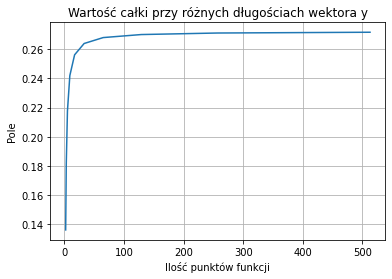

In [8]:
# Metoda Romberga
dx = range(0, 10)
romb = []
len_x = []
for i in dx:
    x = np.linspace(0, np.pi/4, 2**i + 1)
    romb.append(sp.integrate.romb(f(x), np.pi/4/(2**i + 1)))
    len_x.append(len(x))
plt.plot(len_x, romb)
plt.title("Wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

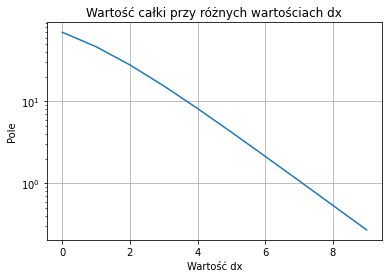

In [9]:
# Metoda Romberga
dx = range(0, 10)
romb = []
x = np.linspace(0, np.pi/4, 2**9 + 1)
for i in dx:
    romb.append(sp.integrate.romb(f(x), np.pi/4/(2**i + 1)))
plt.plot(range(len(dx)), romb)
plt.title("Wartość całki przy różnych wartościach dx")
plt.ylabel("Pole")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

Wnioski: (analogiczne jak w zadaniu 1)

- wszystkie funkcje zwróciły poprawne wartości
- w przypadku wektrora y zawierającego za mało punktów, wynik jest niepoprawny
- zwiększanie parametru dx zwiększa dokładność obliczenia całki

3.022007769448168e-15
5.551115123125783e-17


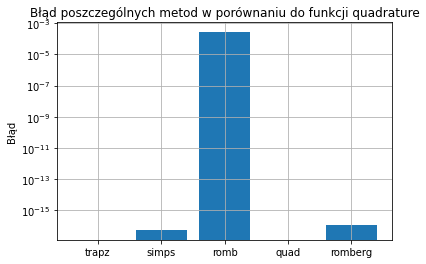

In [10]:
# Porównanie wyników funkcji
f = lambda x: np.log(1 + np.tan(x))
x = np.linspace(0, np.pi/4, 2**10+1)

trapz = sp.integrate.trapz(f(x), x)
simps = sp.integrate.simps(f(x), x)
romb = sp.integrate.romb(f(x), dx=np.pi/4/(2**10 + 1))
quad, _ = scipy.integrate.quad(f, 0, np.pi/4)
print(_)
romberg = scipy.integrate.romberg(f, 0, np.pi/4)
quadrature, _ = scipy.integrate.quadrature(f, 0, np.pi/4)
print(_)

labels = ['trapz', 'simps', 'romb', 'quad', 'romberg']
values = np.abs(quadrature - np.array([trapz, simps, romb, quad, romberg]))
ax = np.arange(5)
plt.bar(ax, values)
plt.xticks(ax, labels)
plt.title("Błąd poszczególnych metod w porównaniu do funkcji quadrature")
plt.ylabel("Błąd")
plt.yscale("log")
plt.grid()
plt.show()

Wnioski:

- wszystkie funkcje porównano do funkcji quadrature, gdyż posiada ona największą dokładność
- wyniki wszystkich funkcji są bardzo dobre, poza funkcją romb. 

Porównanie czasów wykonywania

Trapz

In [11]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
trapz = sp.integrate.trapz(f(x), x)

79.2 µs ± 7.48 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Simps

In [12]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
simps = sp.integrate.simps(f(x), x)

113 µs ± 19.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Romb

In [13]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
romb = sp.integrate.romb(f(x), dx=np.pi/4/(2**10 + 1))

186 µs ± 56.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Quad

In [14]:
%%timeit -r 100 -n 100
quad, _ = scipy.integrate.quad(f, 0, np.pi/4)

54.9 µs ± 7.41 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Romberg

In [15]:
%%timeit -r 100 -n 100
romberg = scipy.integrate.romberg(f, 0, np.pi/4)

34.3 µs ± 6.52 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Quadrature

In [16]:
%%timeit -r 100 -n 100
quadrature, _ = scipy.integrate.quadrature(f, 0, np.pi/4)

37.7 µs ± 5.74 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Wnioski:

- co dziwne, funkcja romb, która wykazała się najgorszą dokładnością, wykonywała się najdłużej
- najszybciej wykonała się funkcja romberg
- funkcje romberg, quad i quadrature wykonały się znacznie szybciej niż trapz, romb oraz simps.

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

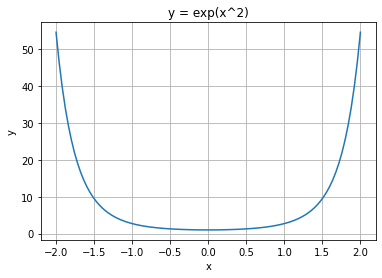

In [17]:
f = lambda x: np.exp(x**2)
x = np.linspace(-2, 2, 100)
plt.plot(x, f(x))
plt.title("y = exp(x^2)")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()

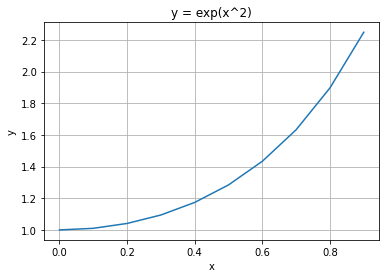

In [18]:
f = lambda x: np.exp(x**2)
x = np.arange(0, 1, 0.1)
plt.plot(x, f(x))
plt.title("y = exp(x^2)")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()

Funkcja jest całkowalna na dowolnym przedziale, ponieważ w całej dziedzinie jest ograniczona, ciągła i różniczkowalna.

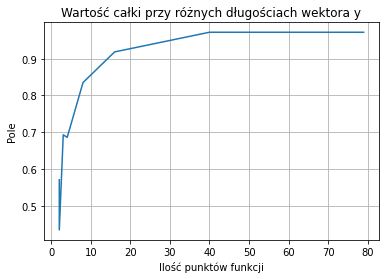

In [19]:
# Metoda trapezów
dx = [0.5, 0.4, 0.3,  0.2, 0.1, 0.05, 0.02, 0.01]
trapz = []
len_x = []
for i in dx:
    f = lambda x: np.exp(x**2)
    x = np.arange(0, np.pi/4, i)
    trapz.append(sp.integrate.trapz(f(x), x))
    len_x.append(len(x))
plt.plot(len_x, trapz)
plt.title("Wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()   

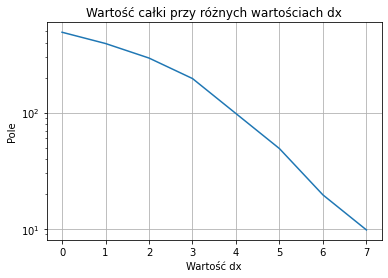

In [20]:
# Metoda trapezów
dx = [0.5, 0.4, 0.3,  0.2, 0.1, 0.05, 0.02, 0.01]
trapz = []
x = np.arange(0, np.pi/4, 0.001)
for i in dx:
    trapz.append(sp.integrate.trapz(f(x), dx = i))
plt.plot(range(len(dx)), trapz)
plt.title("Wartość całki przy różnych wartościach dx")
plt.ylabel("Pole")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

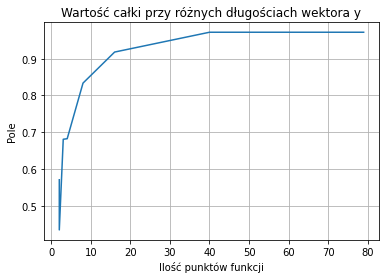

In [21]:
# Metoda Simpsona
dx = [0.5, 0.4, 0.3,  0.2, 0.1, 0.05, 0.02, 0.01]
simps = []
len_x = []
for i in dx:
    f = lambda x: np.exp(x**2)
    x = np.arange(0, np.pi/4, i)
    simps.append(sp.integrate.simps(f(x), x))
    len_x.append(len(x))
plt.plot(len_x, simps)
plt.title("Wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

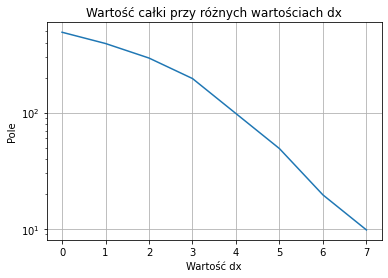

In [22]:
# Metoda Simpsona
dx = [0.5, 0.4, 0.3,  0.2, 0.1, 0.05, 0.02, 0.01]
simps = []
x = np.arange(0, np.pi/4, 0.001)
for i in dx:
    simps.append(sp.integrate.trapz(f(x), dx = i))
plt.plot(range(len(dx)), simps)
plt.title("Wartość całki przy różnych wartościach dx")
plt.ylabel("Pole")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

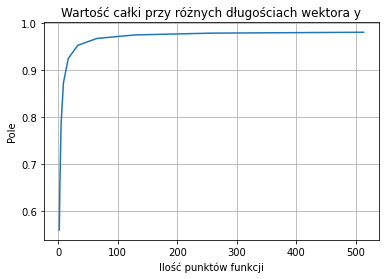

In [23]:
# Metoda Romberga
dx = range(0, 10)
romb = []
len_x = []
for i in dx:
    x = np.linspace(0, np.pi/4, 2**i + 1)
    romb.append(sp.integrate.romb(f(x), np.pi/4/(2**i + 1)))
    len_x.append(len(x))
plt.plot(len_x, romb)
plt.title("Wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

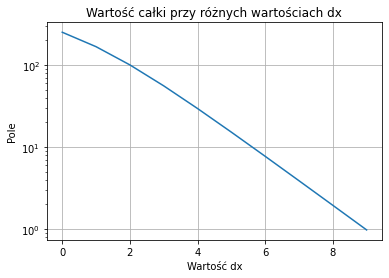

In [24]:
# Metoda Romberga
dx = range(0, 10)
romb = []
x = np.linspace(0, np.pi/4, 2**9 + 1)
for i in dx:
    romb.append(sp.integrate.romb(f(x), np.pi/4/(2**i + 1)))
plt.plot(range(len(dx)), romb)
plt.title("Wartość całki przy różnych wartościach dx")
plt.ylabel("Pole")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

Wnioski:

- wszystkie funkcje zwróciły poprawne wartości
- w przypadku wektrora y zawierającego za mało punktów, wynik jest niepoprawny
- zwiększanie parametru dx zwiększa dokładność obliczenia całki

1.0899588511894889e-14
3.028743367217146e-09


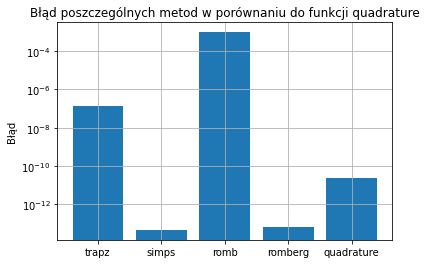

In [25]:
# Porównanie wyników funkcji
f = lambda x: np.exp(x**2)
x = np.linspace(0, np.pi/4, 2**10+1)

trapz = sp.integrate.trapz(f(x), x)
simps = sp.integrate.simps(f(x), x)
romb = sp.integrate.romb(f(x), dx=np.pi/4/(2**10 + 1))
quad, _ = scipy.integrate.quad(f, 0, np.pi/4)
print(_)
romberg = scipy.integrate.romberg(f, 0, np.pi/4)
quadrature, _ = scipy.integrate.quadrature(f, 0, np.pi/4)
print(_)

labels = ['trapz', 'simps', 'romb', 'romberg', 'quadrature']
values = np.abs(quad - np.array([trapz, simps, romb, romberg, quadrature]))
ax = np.arange(5)
plt.bar(ax, values)
plt.xticks(ax, labels)
plt.title("Błąd poszczególnych metod w porównaniu do funkcji quadrature")
plt.ylabel("Błąd")
plt.yscale("log")
plt.grid()
plt.show()

Wnioski:

- tym razem funkcje porównano z funkcją quad, gdyż okazała się dokładniejsza od quadrature
- w przypadku funkcji e^x^2 błędy wszystkich funkcji są nieco większe niż w przypadku funkcji z 1 zadania.
- także w tym przypadku funkcja romb wypadła najgorzej. Gorzej też (w porównaniu do zad. 1) wypadła funkcja trapz i quadrature.

Porównanie czasów wykonywania

Trapz

In [26]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
trapz = sp.integrate.trapz(f(x), x)

The slowest run took 4.57 times longer than the fastest. This could mean that an intermediate result is being cached.
80 µs ± 31.5 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Simps

In [27]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
simps = sp.integrate.simps(f(x), x)

111 µs ± 13.2 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Romb

In [28]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
romb = sp.integrate.romb(f(x), dx=np.pi/4/(2**10 + 1))

167 µs ± 28.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Quad

In [29]:
%%timeit -r 100 -n 100
quad, _ = scipy.integrate.quad(f, 0, np.pi/4)

25.6 µs ± 4.45 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Romberg

In [30]:
%%timeit -r 100 -n 100
romberg = scipy.integrate.romberg(f, 0, np.pi/4)

189 µs ± 30.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Quadrature

In [31]:
%%timeit -r 100 -n 100
quadrature, _ = scipy.integrate.quadrature(f, 0, np.pi/4)

109 µs ± 7.58 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Wnioski:

- zdecydowanie najlepiej wypadła funkcja quad, osiągając największą dokładność przy najkrótszym czasie wykonywania.
- reszta funkcji osiągnęła podobne czasy, znacznie gorsze od funkcji quad.

Podsumowanie:

Na zajęciach zapoznano się z całkowaniem numerycznym. Poznano 6 funkcji: trapz, simps, romb, quad, romberg oraz quadrature służących do całkowania. Wszystkie funkcje poddano analizie czasowej i zbadano dokładność. Według mnie, faworytem została funkcja quad, osiągająca bardzo dobrą dokładność, a zarazem wykonująca się w krótkim czasie.